The goal of this code is to provide meaningful metrics for my Nightcrawler Hero Review.

In [1]:
import numpy as nP
import matplotlib as mY
import matplotlib.pyplot as plt  # For plotting
from collections import Counter as ctr


In [2]:
class card:
    def __init__(self, name, printed_cost, true_cost,copies):
        self.name = name
        self.printed_cost = printed_cost
        self.true_cost = true_cost
        self.copies = copies
    def display(self):
        print(f"name: {self.name}")
        print(f"printed cost: {self.printed_cost}")
        print(f"true cost: {self.true_cost}")

In [3]:
def total_printed_cost(deck):
    printed_cost = []
    for c in range(len(deck)):
        printed_cost.append(deck[c].printed_cost*deck[c].copies)

    #initialze total cost
    total_printed_cost = 0
    for i in printed_cost:
        total_printed_cost += i
    return total_printed_cost

def printed_cost_curve(deck,total_printed_cost): 
    num_cards = 0
    for c in range(len(deck)):
        num_cards += deck[c].copies
    avg_printed_cost = total_printed_cost / num_cards
    return avg_printed_cost

def total_true_cost(deck):
    true_cost = []
    for c in range(len(deck)):
        true_cost.append(deck[c].true_cost*deck[c].copies)

    #initialze total true_cost
    total_true_cost = 0
    for i in true_cost:
        total_true_cost += i
    return total_true_cost

def true_cost_curve(deck,total_true_cost): 
    num_cards = 0
    for c in range(len(deck)):
        num_cards += deck[c].copies
    avg_true_cost = total_true_cost / num_cards
    return avg_true_cost

def printed_cost_list(deck):
    cost = []
    for c in range(len(deck)):
        for _ in range(deck[c].copies):
            cost.append(deck[c].printed_cost)
    return cost

def true_cost_list(deck):
    true_cost = []
    for c in range(len(deck)):
        for _ in range(deck[c].copies):
            true_cost.append(deck[c].true_cost)
    return true_cost

In [4]:
# Use the card class to define all of Kurt's cards.

# How to use:
    # card("insert title of card in quotes", printed cost, true cost, # of copies)
    
bamf = card("Bamf!", 0, 2/3, 3) # weighted average accounting for how I get it
port_away = card("'Port Away",0, 0+1 + 1, 1) # extra +1 to account for cost of discarding bamf from hand
tally_ho = card("Tally Ho!",1, 1+1, 2) # account for returning bamf to hand but then playing it again
scout_ahead = card("Scout Ahead",1, 1+1, 2)
port_and_punch = card("'Port and Punch'",2, 2+1, 2) 
teleport_drop = card("Teleport Drop'",2, 2+1 + bamf.true_cost, 1) # accounts for needing to discard a bamf from play
prehensile_tail = card("Prehensile Tail'",1, 1+1, 1)
kurts_chapel = card("Kurt's Chapel",1, 1+1, 1)
kurts_cutlasses = card("Kurt's Cutlasses",2, 2+1, 1)
day_tripper = card("Daytripper",2, 2+1 - 1 * 2/3, 1) # accounts for her finding a bamf 2/3 of the time, didn't use bamf.true_cost because I didn't want to double counrt

# create a list that represents the deck
deck = [bamf, port_away,tally_ho,scout_ahead,port_and_punch,teleport_drop,prehensile_tail,kurts_chapel,kurts_cutlasses,day_tripper]
deck = nP.array(deck)

In [5]:
total_printed_cost = total_printed_cost(deck)
printed_cost_curve = printed_cost_curve(deck,total_printed_cost)

total_true_cost = total_true_cost(deck)
true_cost_curve = true_cost_curve(deck,total_true_cost)
print(total_true_cost)
print(true_cost_curve)
print(printed_cost_curve)

31.0
2.066666666666667
1.0666666666666667


printed cost list [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2]
true cost list [0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 2, 2, 2, 2, 2, 3, 3, 3.6666666666666665, 2, 2, 3, 2.3333333333333335]
printed cost list [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2]
true cost list [0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 2, 2, 2, 2, 2, 3, 3, 3.6666666666666665, 2, 2, 3, 2.3333333333333335]
sorted tc: Counter({2: 7, 0.6666666666666666: 3, 3: 3, 3.6666666666666665: 1, 2.3333333333333335: 1})
tc_sort is: [0.66666667 2.         2.33333333 3.         3.66666667] [3 7 1 3 1]


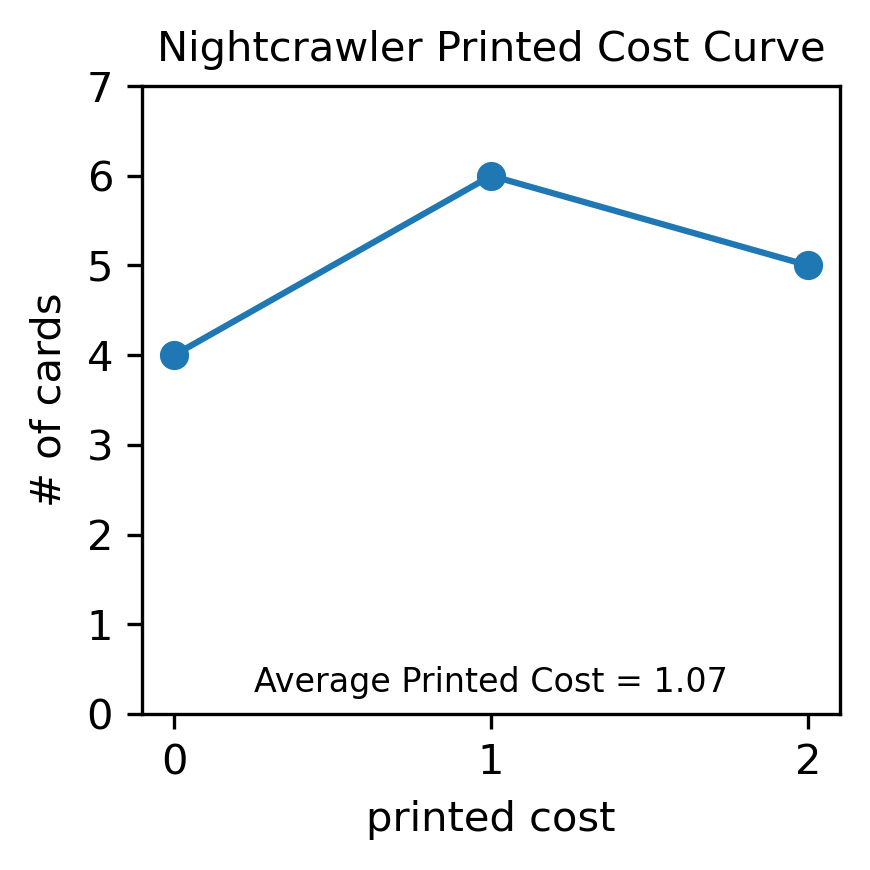

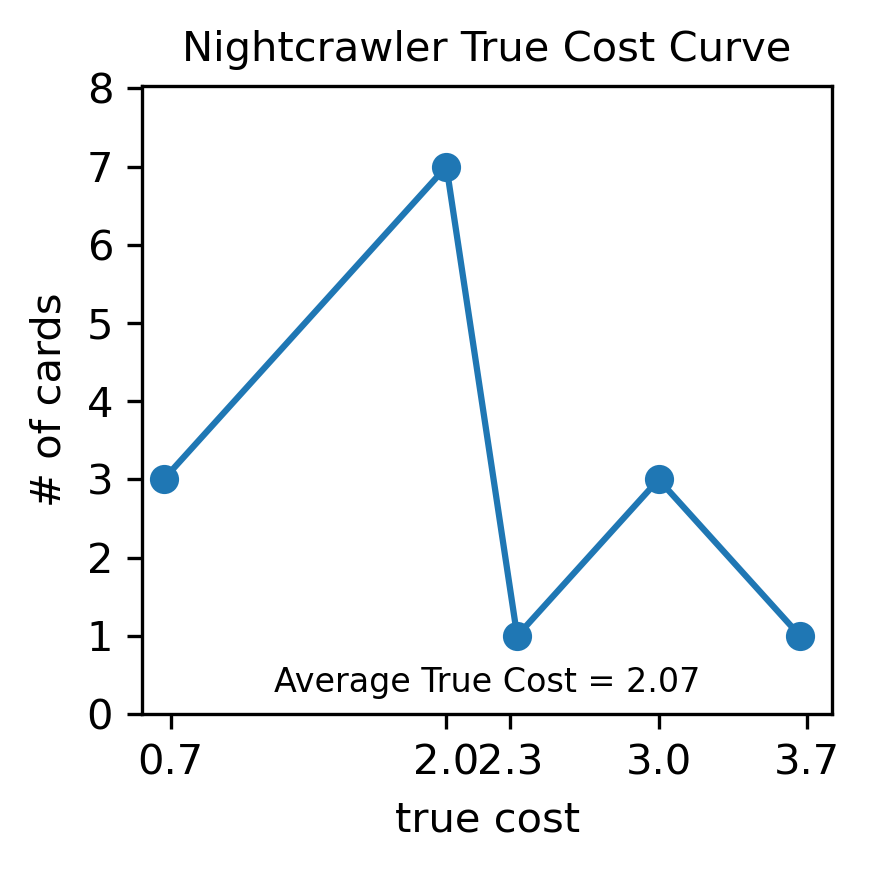

In [6]:
# now to create a cost curve plot

# create a line graph that plots every card 

sorted_printed_cost = printed_cost_list(deck) 
sorted_true_cost = true_cost_list(deck)

print(f'printed cost list {sorted_printed_cost}')
print(f'true cost list {sorted_true_cost}')

sorted_printed_cost = printed_cost_list(deck) 
sorted_true_cost = true_cost_list(deck)

print(f'printed cost list {sorted_printed_cost}')
print(f'true cost list {sorted_true_cost}')

# Use Counter from collections to count how many of each unique value there are
pc_counts = ctr(sorted_printed_cost)
tc_counts = ctr(sorted_true_cost)
print('sorted tc:', tc_counts)

# Sort counts by keys
pc_counts_sorted = dict(sorted(pc_counts.items()))  # Sorts by keys in ascending order
tc_counts_sorted = dict(sorted(tc_counts.items()))  # Sorts by keys in ascending order

# Define x and y axis from the sorted counts
pc_x = nP.array(list(pc_counts_sorted.keys()))  # The unique values
pc_y = nP.array(list(pc_counts_sorted.values()))  # Their corresponding frequencies (counts)

tc_x = nP.array(list(tc_counts_sorted.keys()))
tc_y = nP.array(list(tc_counts_sorted.values()))

# Now you can use pc_x, pc_y, tc_x, and tc_y for plotting

print('tc_sort is:',tc_x, tc_y)
# First plot
plt.figure(num=1, figsize=[3.0, 3.0], dpi=300)
plt.plot(pc_x, pc_y, marker='o')
plt.xlim(pc_x[0] - 0.1)
y_min, y_max = plt.ylim()
plt.ylim(0, y_max*1.1)
plt.xticks(pc_x)
plt.yticks(nP.arange(0, nP.ceil(y_max) + 1, 1))  # Counts by 1
plt.ylabel('# of cards')
plt.xlabel('printed cost')
plt.title('Nightcrawler Printed Cost Curve', fontsize=10)

# Adjusted text position to match the second plot
plt.text(0.5, 0.05, f'Average Printed Cost = {printed_cost_curve:.2f}', 
         fontsize=8, transform=plt.gca().transAxes, 
         ha='center', va='center')

plt.tight_layout()
plt.show()

# Second plot
plt.figure(num=2, figsize=[3.0, 3.0], dpi=300)
plt.plot(tc_x, tc_y, marker='o')
plt.xlim(tc_x[0] - 0.1)
y_min, y_max = plt.ylim()
plt.ylim(0, y_max*1.1)
plt.xticks(nP.round(tc_x,1))
plt.yticks(nP.arange(0, nP.ceil(y_max) + 1, 1))  # Counts by 1
plt.ylabel('# of cards')
plt.xlabel('true cost')
plt.title('Nightcrawler True Cost Curve', fontsize=10)

# Add text for average true cost
plt.text(0.5, 0.05, f'Average True Cost = {true_cost_curve:.2f}', 
         fontsize=8, transform=plt.gca().transAxes, 
         ha='center', va='center')

plt.tight_layout()
plt.show()